In [2]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt
import cv2
import datetime

Link dataset : https://www.kaggle.com/datasets/charunisa/eyes-dataset

In [3]:
# Create a TensorBoard callback
log_dir = "logs/" + datetime.datetime.now().strftime("TENSORBOARD")  # Adjust the log directory as needed
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [4]:
TRAINING_DIR = '/home/faqih/TUGAS2AI/data/training'
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=5,
    class_mode='binary'
    )

        
VALIDATION_DIR = '/home/faqih/TUGAS2AI/data/testing'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=5,
class_mode='binary')

Found 3780 images belonging to 2 classes.
Found 1068 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # 3 = RGB
    tf.keras.layers.MaxPooling2D(2, 2), # Pooling Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # Pooling Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # Pooling Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), # Pooling Layer

    # from 2D to 1D (Flatten)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
# Compile a Model
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
    )   

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback]
    )

Epoch 1/50
756/756 [==============================] - 79s 103ms/step - loss: 0.5666 - accuracy: 0.6881 - val_loss: 0.4939 - val_accuracy: 0.7622
Epoch 2/50
756/756 [==============================] - 78s 103ms/step - loss: 0.3460 - accuracy: 0.8630 - val_loss: 0.2881 - val_accuracy: 0.8923
Epoch 3/50
756/756 [==============================] - 86s 113ms/step - loss: 0.2601 - accuracy: 0.8992 - val_loss: 0.2154 - val_accuracy: 0.9213
Epoch 4/50
756/756 [==============================] - 77s 102ms/step - loss: 0.2272 - accuracy: 0.9135 - val_loss: 0.1811 - val_accuracy: 0.9363
Epoch 5/50
756/756 [==============================] - 73s 97ms/step - loss: 0.2047 - accuracy: 0.9259 - val_loss: 0.2062 - val_accuracy: 0.9223
Epoch 6/50
756/756 [==============================] - 73s 96ms/step - loss: 0.1963 - accuracy: 0.9291 - val_loss: 0.1881 - val_accuracy: 0.9335
Epoch 7/50
756/756 [==============================] - 84s 111ms/step - loss: 0.1771 - accuracy: 0.9328 - val_loss: 0.1658 - val_accu

In [7]:
# Save the model to a file
model.save('model_punyafaqih.h5')

/home/faqih/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Load the saved model
load_model = tf.keras.models.load_model('model_punyafaqih.h5')

In [9]:
# Evaluate the loaded model with test data
test_loss, test_acc = load_model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

214/214 [==============================] - 6s 26ms/step - loss: 0.1192 - accuracy: 0.9625
Test accuracy: 0.9625468254089355


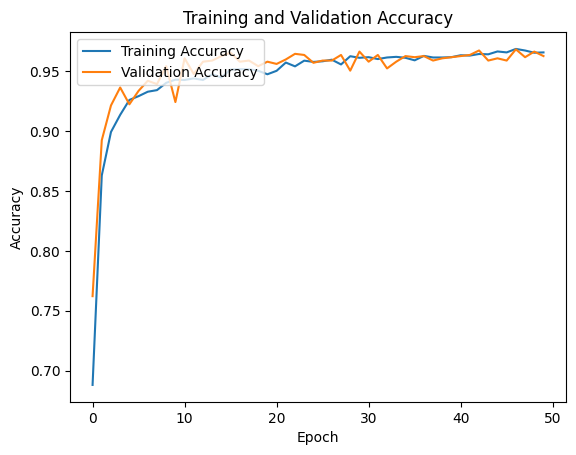

In [12]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy per epoch
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Specify the directory and filename for saving the plot
save_dir = '/home/faqih/TUGAS2AI/plot'  # Change to your desired directory
save_filename = 'train_test_plot_punyafaqih.png'  # Change to your desired filename

# Save the plot to the specified directory and filename
plt.savefig(os.path.join(save_dir, save_filename))

# Display the plot (optional)
plt.show()


In [31]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Load your trained model (ensure the path is correct)
model_path = '/home/faqih/TUGAS2AI/model_punyafaqih.h5'
loaded_model = load_model(model_path)

def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    return classes[0][0]

def upload_and_predict():
    image_path = input("Enter the file path of the image: ")

    confidence = predict_image_class(image_path, loaded_model)
    
    if confidence > 0.5:
        print("Open eyes")
    else:
        print("Closed eyes")

    # Display the image
    image_to_be_display = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image_rgb = cv2.cvtColor(image_to_be_display, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    print()
    print()

def upload_and_predict_repeated(iterate):
    for i in range(1, iterate+1):
        print("Image number " + str(i))
        upload_and_predict()

1/1 [==============================] - 0s 36ms/step
Open eyes


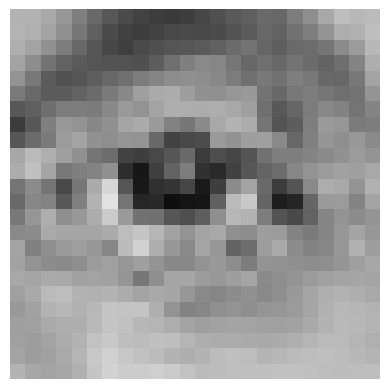

In [33]:
upload_and_predict()

1/1 [==============================] - 0s 37ms/step
Open eyes


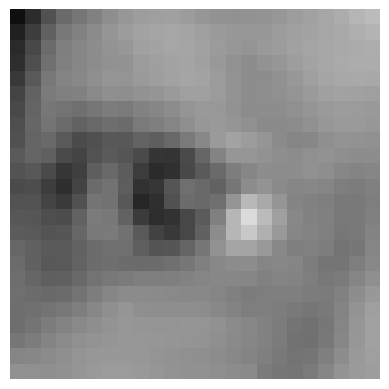

In [35]:
upload_and_predict()

1/1 [==============================] - 0s 36ms/step
Closed eyes


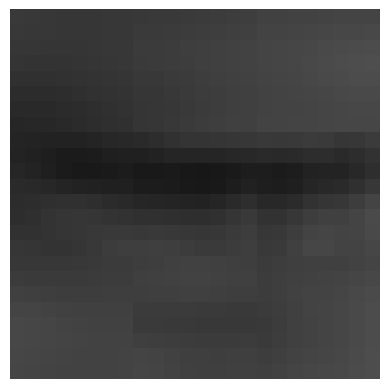

In [36]:
upload_and_predict()